# Моделирование ускорения Нестерова с помощью обыкновенных дифференциальных уравнений

По материалам статьи [[W.Su, S. Boyd, E.Candes 2015]](https://arxiv.org/pdf/1503.01243.pdf)

## Постановка задачи

$$
\min_{x \in \mathbb{R}^n} f(x)
$$
- $f$ - непрерывная и дифференцируемая
- ограничений на $x$ нет
- для решения задачи можно использовать только значение функции и её градиент

## И снова градиентный спуск...

$$
x_{k+1} = x_{k} - \alpha f'(x_k)
$$

**Теорема.** 

Пусть 

- $f(x)$ дифференцируема на $\mathbb{R}^n$, 
- градиент $f(x)$ удовлетворяет условию Липшица с константой $L$
- $f(x)$ ограничена снизу
- $\alpha = const$ и $0 < \alpha < \frac{2}{L}$

Тогда для градиентного метода выполнено:
$$
\lim\limits_{k \to \infty} f'(x_k) = 0,
$$
а функция монотонно убывает $f(x_{k+1}) < f(x_k)$.

## Интерпретация градиентного спуска 

Рассмотрим обыкновенное диференциальное уравнение вида:
$$
\frac{dx}{dt} = -f'(x(t)) \quad x(0) = x_0
$$
и дискретизуем его на равномерной сетке с шагом $\alpha$:
$$
\frac{x_{k+1} - x_k}{\alpha} = -f'(x_k),
$$
где $x_k \equiv x(t_k)$ и $\alpha = t_{k+1} - t_k$ - шаг сетки.

Отсюда получаем выражение для $x_{k+1}$
$$
x_{k+1} = x_k - \alpha f'(x_k),
$$
которое в точности совпадает с выраением для градиентного спуска.

Такая схема называется явной или прямой схемой Эйлера.

**Вопрос:** какая схема называется неявной или обратной?

In [81]:
import numpy as np

alpha = 10
def gradf(t):
    return alpha*t

x0 = 1
a = 0
b = 1
h = 1e-2
N = int((b - a) / h)
x = [x0]
for i in xrange(N):
    x.append(x[i] - h * gradf(x[i]))

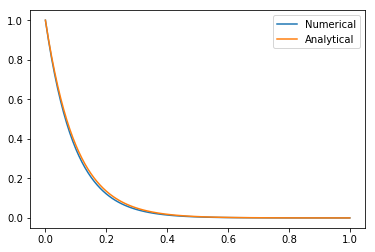

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
t = np.linspace(a, b, N+1, endpoint=True)
plt.plot(t, x, label="Numerical")
plt.plot(t, x0 * np.exp(-alpha*t), label="Analytical")
plt.legend()

## Концепция нижних оценок скоростей сходимости

## Нижняя оценка скорости сходимости



## Оценка сходимости для градиентного спуска



## Оптимальный метод Нестерова

- $x_0 = y_0$
- $s \leq \frac{1}{L}$, где $L$ константа Липшица для градиента
- 
\begin{equation*}
\begin{split}
& x_k = y_{k-1} - sf'(y_{k-1})\\
& y_k = x_k + \frac{k-1}{k+2}(x_k - x_{k-1})
\end{split}
\end{equation*}

- Сходимость
$$
f(x_k) - f^* \leq O\left(\frac{\| x_k - x_0\|^2}{sk^2}\right)
$$

## Интерпретация метода Нестерова

- Если градиентному спуску можно поставить в соответствие ОДУ, то какое ОДУ можно поставить в соответствие методу Нестерова?
- Вот такое
$$
\ddot{x} + \frac{3}{t}\dot{x} + f'(x) = 0, \quad x(0) = x_0 \quad \dot{x}(0) = 0
$$

Доказательство на доске

## Сходимость траектории к точке минимума $f$

**Теорема.**

Пусть $X(t)$ единственное глобальное pешение ОДУ для любой выпуклой функции $f$, у градиента которой может быть бесконечная константа Липшица.
Тогда для $t > 0$
$$
f(X(t)) − f^* \leq \frac{\| x^* - x_0\|^2}{t^2}
$$

Доказательство на доске

## Влияние "трения" - $\frac{3}{t}\dot{x}$

- Метод Нестерова сходится немонотонно к решению из-за наличия "момента импульса"
- Для небольших $t$ множитель $\frac{3}{t}$ велик - предотвращение осцилляций
- Для больших $t$ множитель $\frac{3}{t}$ мал - система сильнее подверждена осцилляциям

### Пример